Evaluation Metrics:
Accuracy : 81.97%
Precision: 0.2812
Recall   : 0.2308


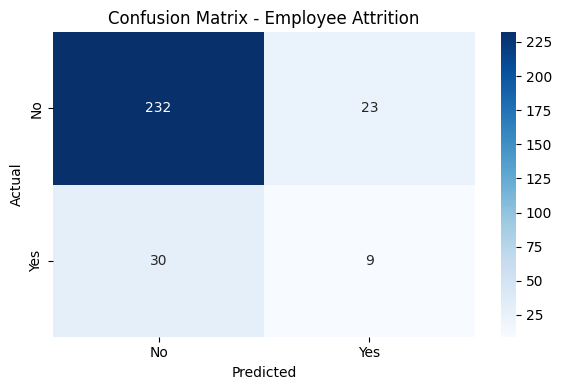

FloatSlider(value=3.0, description='Job Satisfaction:', max=4.0, min=1.0, step=1.0)

FloatText(value=0.0, description='Hourly Rate:')

FloatSlider(value=3.0, description='Environment Satisfaction:', max=4.0, min=1.0, step=1.0)

FloatText(value=0.0, description='Years at Company:')

Button(description='Predict Attrition', style=ButtonStyle())

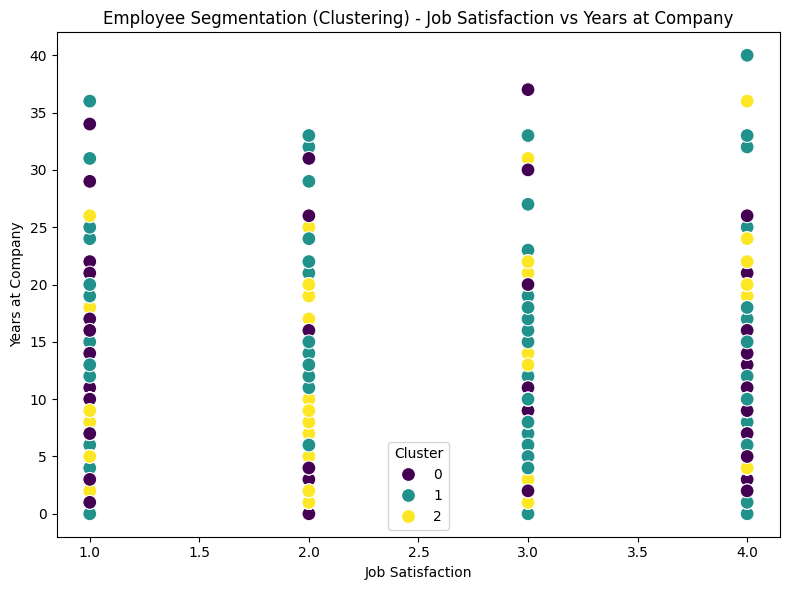

In [18]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score
from sklearn.cluster import KMeans
import ipywidgets as widgets
from IPython.display import display

# Load the dataset
df = pd.read_csv("/content/6. Predict Employee Attrition.csv")

# Drop irrelevant columns that are not related to employee attrition
df = df.drop(columns=['EmployeeCount', 'EmployeeNumber', 'Over18', 'StandardHours'])

# Feature selection: Select relevant columns for prediction
relevant_columns = ['JobSatisfaction', 'HourlyRate', 'EnvironmentSatisfaction', 'YearsAtCompany', 'Attrition']
df = df[relevant_columns]

# Encode categorical variables (if any) to numerical format using LabelEncoder
label_encoders = {}
for column in df.select_dtypes(include='object').columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

# Separate the features (X) and the target variable (y)
X = df.drop('Attrition', axis=1)
y = df['Attrition']

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Random Forest Classifier model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Make predictions using the test set
y_pred = model.predict(X_test)

# Evaluate the model using various metrics
conf_matrix = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred) * 100
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

# Print evaluation metrics
print("Evaluation Metrics:")
print(f"Accuracy : {accuracy:.2f}%")
print(f"Precision: {precision:.4f}")
print(f"Recall   : {recall:.4f}")

# Confusion Matrix Heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.title('Confusion Matrix - Employee Attrition')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()

# Function to predict whether the employee will stay or leave
def predict_employee(job_satisfaction, hourly_rate, environment_satisfaction, years_at_company):
    # Create a DataFrame with the input values
    new_employee = pd.DataFrame({
        'JobSatisfaction': [job_satisfaction],
        'HourlyRate': [hourly_rate],
        'EnvironmentSatisfaction': [environment_satisfaction],
        'YearsAtCompany': [years_at_company]
    })

    # Predict whether the employee will leave the company (1 = Yes, 0 = No)
    predicted_attrition = model.predict(new_employee)

    # Output the prediction
    if predicted_attrition[0] == 1:
        return "The employee is likely to leave the company."
    else:
        return "The employee is likely to stay with the company."

# Creating input widgets for employee details
job_satisfaction_widget = widgets.FloatSlider(value=3, min=1, max=4, step=1, description="Job Satisfaction:")
hourly_rate_widget = widgets.FloatText(description="Hourly Rate:")
environment_satisfaction_widget = widgets.FloatSlider(value=3, min=1, max=4, step=1, description="Environment Satisfaction:")
years_at_company_widget = widgets.FloatText(description="Years at Company:")

# Display input widgets
display(job_satisfaction_widget, hourly_rate_widget, environment_satisfaction_widget, years_at_company_widget)

# Function to handle the prediction when values are changed
def on_button_click(b):
    job_satisfaction = job_satisfaction_widget.value
    hourly_rate = hourly_rate_widget.value
    environment_satisfaction = environment_satisfaction_widget.value
    years_at_company = years_at_company_widget.value

    # Make the prediction based on user input
    prediction = predict_employee(job_satisfaction, hourly_rate, environment_satisfaction, years_at_company)

    # Display the prediction result
    print(prediction)

# Create a button to trigger the prediction
predict_button = widgets.Button(description="Predict Attrition")
predict_button.on_click(on_button_click)

# Display the button
display(predict_button)

# Clustering (Segmentation) - KMeans clustering
# Let's perform KMeans clustering to segment employees based on job satisfaction, hourly rate, and years at the company
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(X)

# Visualizing the clustering (you can modify based on more features)
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df['JobSatisfaction'], y=df['YearsAtCompany'], hue=df['Cluster'], palette='viridis', s=100)
plt.title('Employee Segmentation (Clustering) - Job Satisfaction vs Years at Company')
plt.xlabel('Job Satisfaction')
plt.ylabel('Years at Company')
plt.legend(title='Cluster')
plt.tight_layout()
plt.show()
